<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/Copy_of_seattle_rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

In [1]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
rcParams['figure.figsize'] = 11.7,8.27


plt.figure(figsize = (12,17))
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


<Figure size 864x1224 with 0 Axes>

In [2]:
import numpy as np
# what % of days did it rain?
df.rain.sum()/len(df)


0.4265977848225118

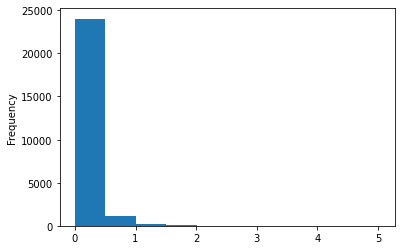

In [3]:
# what values are seen in the prcp column
df.prcp.plot(kind="hist")

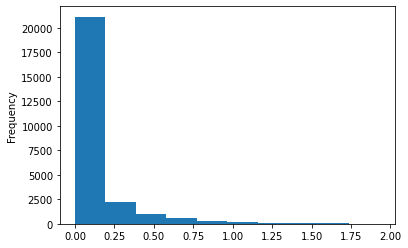

In [4]:
# show me a histogram of prcp < 2
df.prcp.loc[df['prcp'] <2 ].plot(kind="hist")

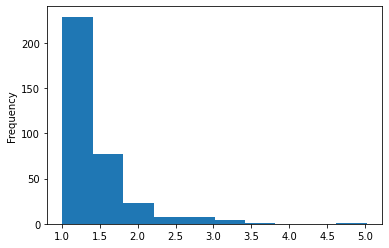

In [5]:
#for >1 inch of rain?
df.prcp.loc[df['prcp']>1].plot(kind="hist")

#### Check for Missing Values and Outliers

In [6]:
# how many null values does each column have?
df.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [7]:
# show me the null rows
df.loc[df['prcp'].isnull()]

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [8]:
# drop the null rows and update the dataframe
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

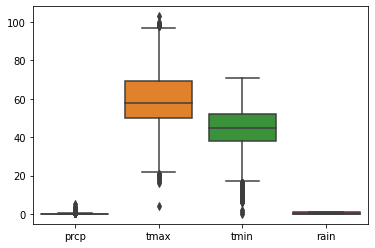

In [10]:
import seaborn as sns

# make a box plot
sns.boxplot(data=df);

In [11]:
# show me some outler values from tmax or tmin
df.tmax.value_counts()[-5:]

17     1
19     1
100    1
4      1
16     1
Name: tmax, dtype: int64

In [12]:
df.tmax.mean()

59.54305620792234

In [13]:
df.tmin.value_counts()[-5:]

7     4
2     1
1     1
71    1
0     1
Name: tmin, dtype: int64

In [14]:
np.mean(df.tmin)

44.513386566463126

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


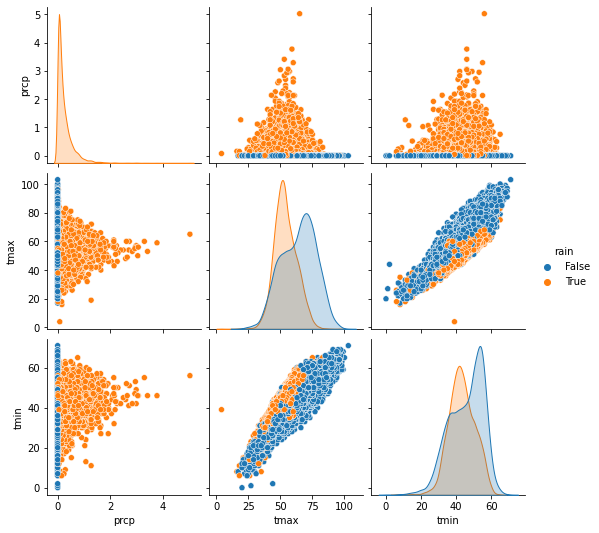

In [15]:
# make an sns pairplot with hue='rain'
sns.pairplot(df, hue="rain");

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      25548 non-null  object 
 1   prcp    25548 non-null  float64
 2   tmax    25548 non-null  int64  
 3   tmin    25548 non-null  int64  
 4   rain    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [17]:
df.ds= df.ds.apply(np.datetime64)


In [18]:
ymd_ds= df.ds.apply("{:%Y-%m-%d}".format)

In [19]:
ymd_ds[0]

'1948-01-01'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      25548 non-null  datetime64[ns]
 1   prcp    25548 non-null  float64       
 2   tmax    25548 non-null  int64         
 3   tmin    25548 non-null  int64         
 4   rain    25548 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.4+ MB


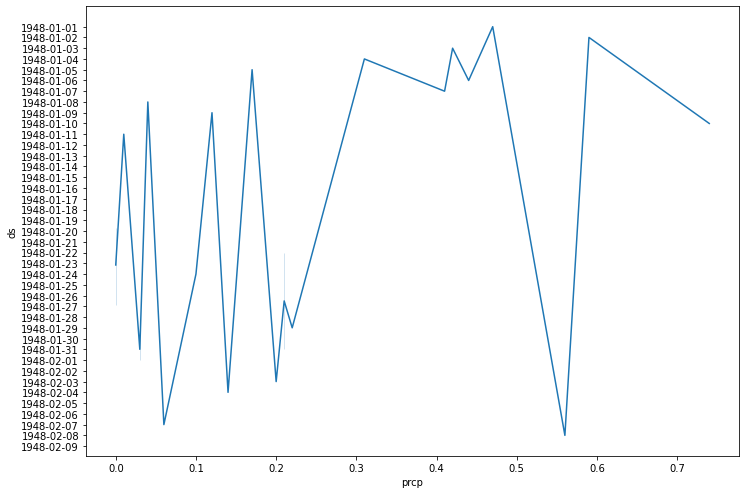

In [21]:
# bonus challenge
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

sns.lineplot(y= ymd_ds, x="prcp", data =df[:40]);

## Set up a basic model to make predicitons

First, split the data...

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = df.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Bring in a model now...

In [23]:
from sklearn.linear_model import LogisticRegression

# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# predict the y values from X test data
lr.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [26]:
preds = lr.predict(X_test)

In [27]:
# how'd your model score?
(y_test==preds).mean()

0.9257664709719504

In [28]:
accuracy_score(y_test, preds)

0.9257664709719504